In [135]:
# install OpenCV
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Imagea

!pip3 install opencv-python
import cv2

In [188]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from PIL import Image
import math
img = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")
img3 = cv2.imread("image3.jpg")

In [192]:
#Gaussian Blur
def dst(pos, size):
    return abs(math.floor(size/2) - pos)

def GaussianBlurring(size, sig):
    gauss = np.zeros((size, size))
    sum1 = 0
    for x in range(size):
        for y in range(size):
            dst0 = dst(x,size)
            dst1 = dst(y, size)
            gauss[y, x] = ((1/(2*np.pi*sig**2))*np.exp(-(dst0**2 + dst1**2)/(2*sig**2)))
            sum1 += gauss[y, x]
    norm = 1/sum1
    for x in range(size):
        for y in range(size):
            gauss[y, x] = norm * gauss[y, x]

    return gauss

In [177]:

# Convolution function
def convolution(kernel, image):
    kernel = np.flipud(np.fliplr(kernel))
    result = np.zeros((image.shape[0], image.shape[1]))
    pad_x = int((kernel.shape[1]-1)/2)
    pad_y = int((kernel.shape[0]-1)/2)
    
    padding = np.zeros((image.shape[0]+pad_y*2, image.shape[1]+pad_x*2))
    padding[pad_x : -pad_x, pad_y: -pad_y] = image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            result[y, x] = (kernel * padding[y: y+kernel.shape[0], x: x+kernel.shape[1]]).sum()
    return result

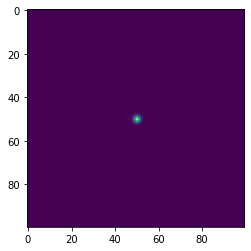

In [193]:
#Test I
blurKernel = GaussianBlurring(100, 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(blurKernel)



In [179]:
# Gradient Magnitude
def gradientMag(f):
    x_constant = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    y_constant = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    g_x = convolution(x_constant, f)
    g_y = convolution(y_constant, f)

    grad_mag = np.sqrt((g_x**2)+(g_y**2))

    return grad_mag

(None, [], [])

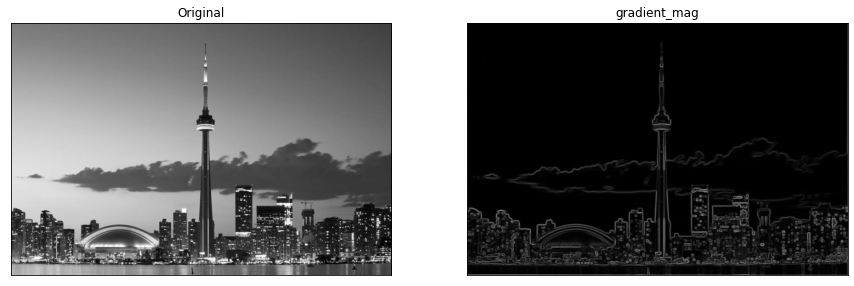

In [180]:
# Test II
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),1)
img_grad = gradientMag(blur)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray,cmap = 'gray')
ax1.title.set_text('Original'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img_grad,cmap = 'gray')
ax2.title.set_text('gradient_mag'), ax2.set_xticks([]), ax2.set_yticks([])

(None, [], [])

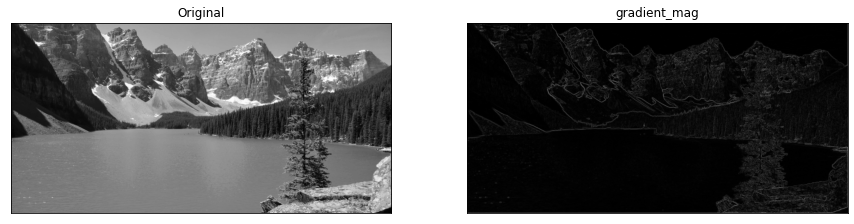

In [156]:
# Test II
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray2,(5,5),1)
img_grad2 = gradientMag(blur)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray2,cmap = 'gray')
ax1.title.set_text('Original'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img_grad2,cmap = 'gray')
ax2.title.set_text('gradient_mag'), ax2.set_xticks([]), ax2.set_yticks([])

(None, [], [])

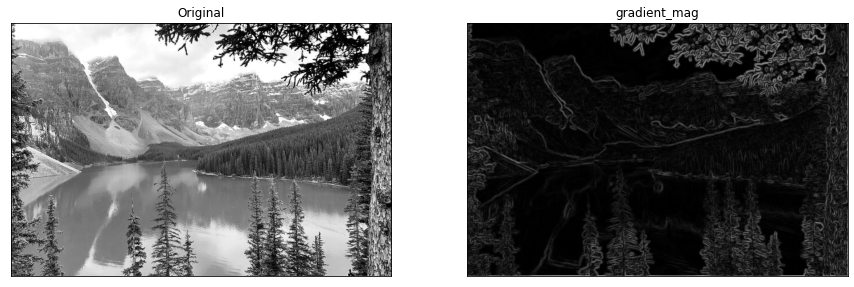

In [161]:
# Test II
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray3,(5,5),1)
img_grad3 = gradientMag(blur)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray3,cmap = 'gray')
ax1.title.set_text('Original'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img_grad3,cmap = 'gray')
ax2.title.set_text('gradient_mag'), ax2.set_xticks([]), ax2.set_yticks([])

In [146]:
def addFloat(lst):
    sum = 0
    for i in lst:
        sum += i
    return sum


In [152]:
#Threshold 
def threshold(g):
    h, w = g.shape
    sum = 0
    for j in range(h):
        for i in range(w):
            sum += g[j, i]
    avg = sum/(h*w)
    i = 0
    mLowClass = []
    mHighClass = []
    for j in range(h):
        for p in range(w):
            if g[j, p] < avg:
                mLowClass.append(g[j, p])
            else:
                mHighClass.append(g[j, p])

    mL = addFloat(mLowClass) / len(mLowClass)
    mH = addFloat(mHighClass) / len(mHighClass)
    i += 1

    sum_i = (mL + mH)/2
    sum_previous = sum
    while abs(sum_i - sum_previous) <= sys.float_info.epsilon:
        mLowClass = []
        mHighClass = []
        for j in range(h):
            for p in range(w):
                if g[j, p] < avg:
                    mLowClass.append(g[j, p])
                else:
                    mHighClass.append(g[j, p])
        mL = addFloat(mLowClass) / len(mLowClass)
        mH = addFloat(mHighClass) / len(mHighClass)
        i += 1
        sum_previous = sum_i
        sum_i = (mL + mH)/2
    
    E = np.zeros((g.shape[0], g.shape[1]))
    for y in range(h):
        for x in range(w):
            if g[y, x] >= sum_i:
                E[y, x] = 255
            # else:
            #     E[y, x] = 0    
    return E

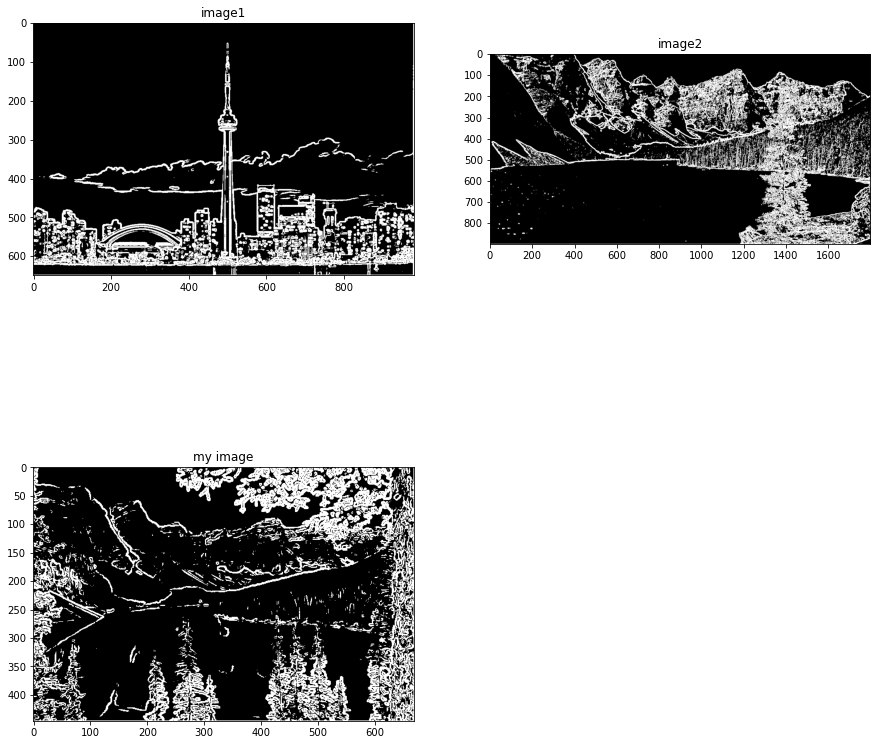

In [169]:
# Test III
E = threshold(img_grad)
E2 = threshold(img_grad2)
E3 = threshold(img_grad3)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.imshow(E,cmap = 'gray')
ax1.title.set_text('image1')
ax2.imshow(E2,cmap = 'gray')
ax2.title.set_text('image2')
ax3.imshow(E3,cmap = 'gray')
ax3.title.set_text('my image')
